In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
trainfraud = pd.read_csv("fraudTrain.csv")
testfraud = pd.read_csv("fraudTest.csv")

In [5]:
trainfraud.head()
testfraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [6]:
trainfraud.info()
testfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35041 non-null  int64  
 1   trans_date_trans_time  35041 non-null  object 
 2   cc_num                 35041 non-null  int64  
 3   merchant               35041 non-null  object 
 4   category               35041 non-null  object 
 5   amt                    35041 non-null  float64
 6   first                  35041 non-null  object 
 7   last                   35041 non-null  object 
 8   gender                 35041 non-null  object 
 9   street                 35041 non-null  object 
 10  city                   35041 non-null  object 
 11  state                  35041 non-null  object 
 12  zip                    35041 non-null  int64  
 13  lat                    35041 non-null  float64
 14  long                   35041 non-null  float64
 15  ci

In [ ]:
trainfraud.describe()
testfraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,38896.000000,3.889600e+04,38896.000000,38895.000000,38895.000000,38895.000000,3.889500e+04,3.889500e+04,38895.000000,38895.000000,38895.000000
mean,19447.500000,4.161619e+17,69.635483,48605.620491,38.541022,-90.099348,8.968390e+04,1.372369e+09,38.538330,-90.097812,0.004216
std,11228.452372,1.307099e+18,151.770779,26801.840317,5.059409,13.609336,3.024601e+05,3.416497e+05,5.096166,13.622281,0.064798
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.057104,-166.584303,0.000000
25%,9723.750000,1.800429e+14,9.690000,26041.000000,34.668900,-96.727000,7.430000e+02,1.372027e+09,34.739666,-96.780057,0.000000
50%,19447.500000,3.518759e+15,46.680000,48088.000000,39.371600,-87.456900,2.443000e+03,1.372405e+09,39.380271,-87.352497,0.000000
75%,29171.250000,4.634956e+15,82.820000,72011.000000,42.014400,-80.158000,2.032800e+04,1.372620e+09,41.974902,-80.207139,0.000000
max,38895.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372992e+09,66.669356,-66.955602,1.000000


<Axes: >

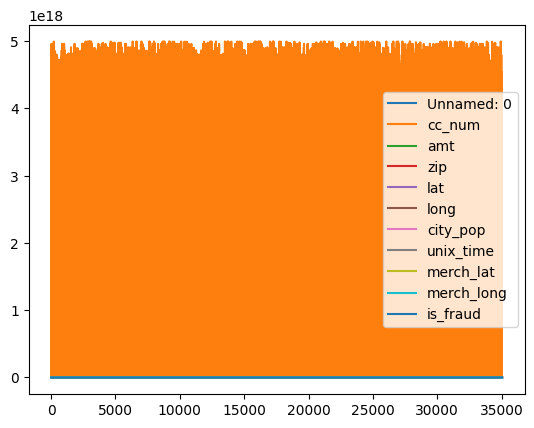

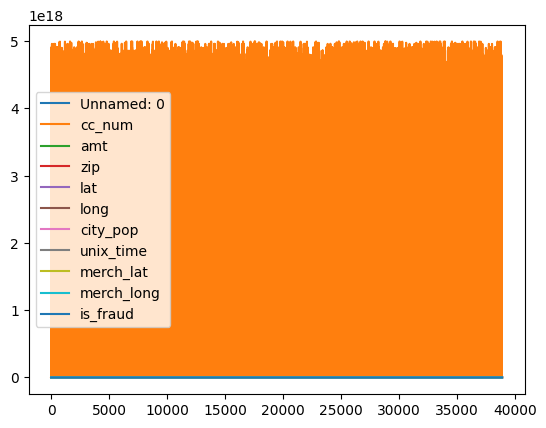

In [ ]:
trainfraud.plot()
testfraud.plot()

In [ ]:
print(testfraud.shape)

(38896, 23)


In [ ]:
print(train.shape)

(35041, 23)


<ipython-input-12-d81bd62fe5ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(testfraud.corr(), annot=True, cmap='Blues')


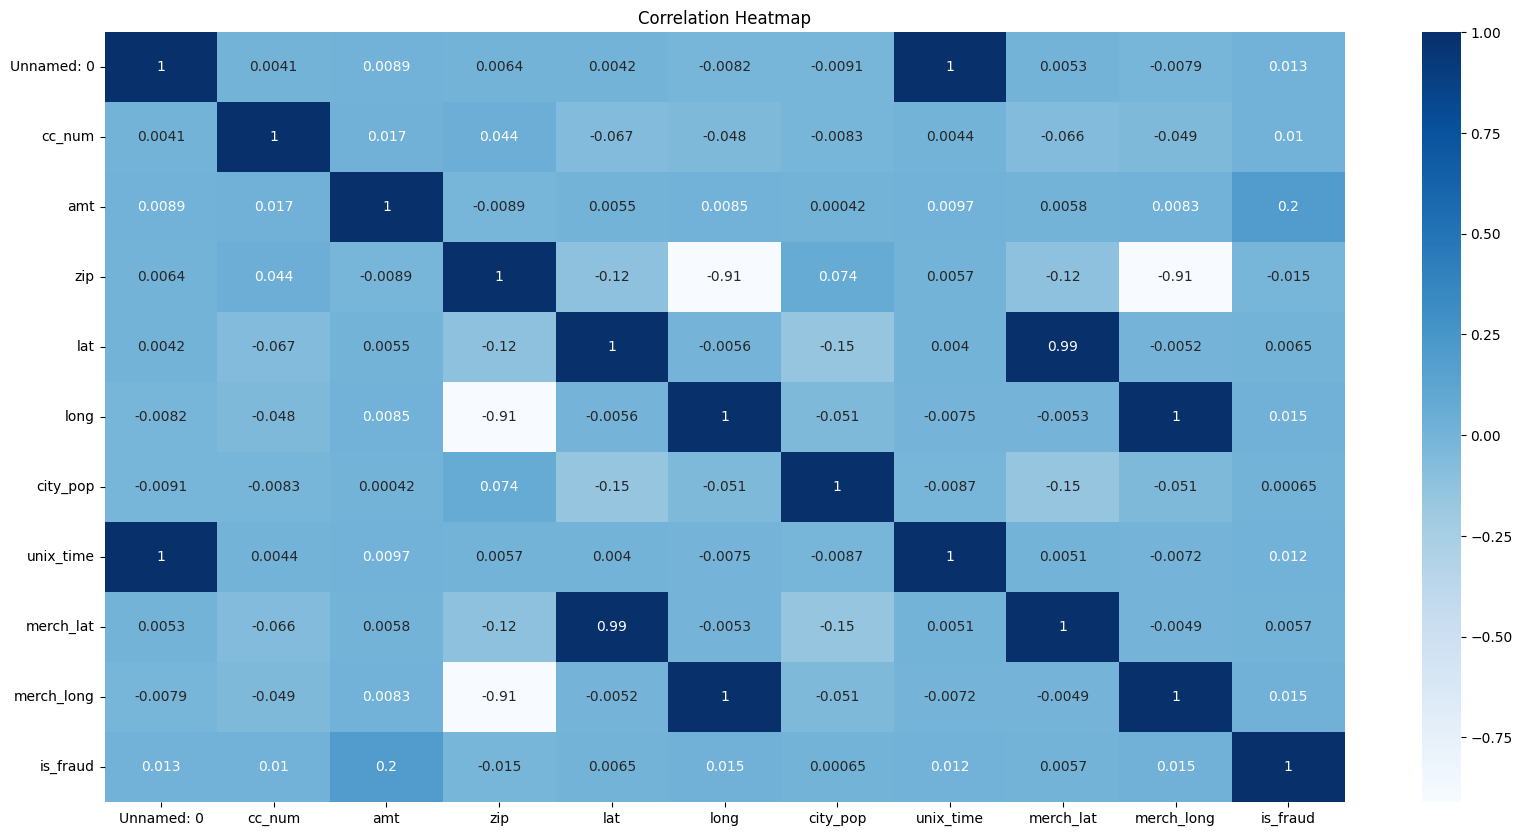

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(testfraud.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-13-fece93500769>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trainfraud.corr(), annot=True, cmap='Blues')


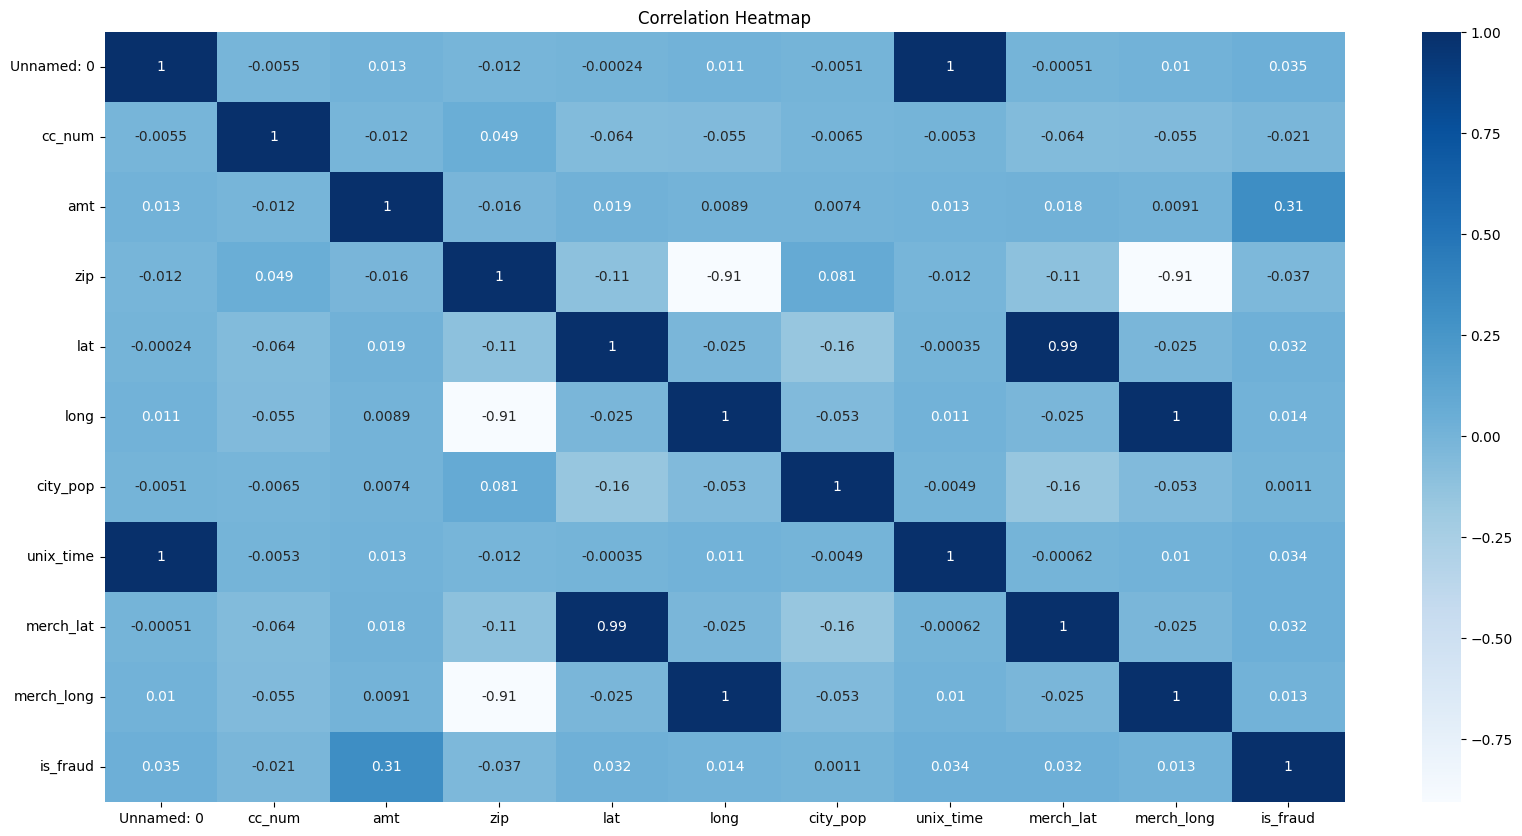

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(trainfraud.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()